## What is Fractional Cover? [[1, 2](#References)]

The Landsat Fractional Cover product stored in DEA is at 25m x 25m resolution (the same as the Landsat surface reflectance products).

Fractional Cover represents the proportion of the land surface
that is bare (BS), covered by photosynthetic vegetation (PV), or non-photosynthetic vegetation (NPV). 

The Fractional Cover product was generated using the spectral unmixing algorithm developed by the Joint Remote Sensing Research Program (JRSRP) [[2](#References)] which used the spectral signature for each pixel to break it up into three fractions, based on field work that determined the spectral characteristics of these fractions. [[1](#References)]The fractions were retrieved by inverting multiple linear regression estimates and using synthetic endmembers in a constrained non-negative least squares unmixing model.[[1](#References)]

The green (PV) fraction includes leaves and grass, the non-photosynthetic fraction (NPV) includes branches, dry grass and dead leaf litter, and the bare soil (BS) fraction includes bare soil or rock.[[1](#References)]

## What is WOFS?

Water Observations from Space (WOfS) is a web service displaying historical surface water observations derived from satellite imagery for all of Australia from 1987 to present day. WOfS aims is to allow better understanding of where water is usually present; where it is seldom observed; and where inundation of the surface has been occasionally observed by satellite. WOfS displays the detected surface water from the Australia-wide Landsat 5 and Landsat 7 satellite imagery archive.

For each grid cell within the map, WOfS displays:

-  the number of clear satellite observations over the period (1987 to present)
-  the number of occasions water was detected
-  the percentage of clear observations on which water was detected, and
-  the confidence (or probability) that a water observation in this location is correct. This is a percentage, based on a number of factors including the slope of the land and the existence of other corroborative evidence.

WOFS is used to filter out cells where water is present, and add the landcover of water to the fractional cover analysis.


### Fractional Cover Bands: [[1](#References)]

- **Bare Soil (bare ground, rock, disturbed) (BS):**  - Bare Ground (bare soil, rock) percentage; Digital Number 10000 = 100%

- **Photosythetic Vegetation. (green grass, trees, etc.) (PV):**  - Photosynthetic Vegetation: Green Vegetation percentage;Digital Number 10000 = 100%

- **Non-Photosythetic vegetation (litter, dead leaf and branches) (NPV):** - Non-Photosynthetic Vegetation (litter, dead leaves andbranches) percentage; Digital Number 10000 = 100%

- **Unmixing Error (UE):**  - Unmixing Error. The residual error, defined as the Euclidean Norm of the Residual Vector. High values express less confidence in the fractional components.
    
__No Data Values:__ Fractional cover contains no data values (-1)
we use the datacube storage function "masking.mask_invalid_data" to remove these from our data before using the data

### Limitations, Errors and Uncertainty:

__Water and soil moisture:__
Pixels over water may show incorrect values for Photosynthetic Vegetation. [[1](#References)] Water has been been masked out, using WOfS. Soil moisture may affect the accuracy of the product [[1](#References)]. 

__Sums greater than 100%:__
"Occasionally the sum of the three components is not equal to 100%. Differences are usually small and are not rounded in order to preserve what may be useful seasonal indicators. "[[1](#References)]

__Similarity between Bare Soil and NPV:__
Model can perform badly on pixels where bare soil and NPV endmembers are similar. [[1](#References)]

__Compared to field data:__
"Based on the comparison with the field data the FC25 product has an overall Root Mean Squared Error (RMSE) of 11.8%. The error margins vary for the three different layers: green RMSE: 11.0%, non-green RMSE: 17.4% and bare RMSE: 12.5%" [[1](#References)]

### How to use this notebook

This note book has been designed to interogate fractional cover information stored on the public facing DEA (Digital Earth Australia). 

What capabilties are sampled.

    - ** This app will utilise the case study area selected on the landing page.
    - ** Explore fractional cover using line plots and stack plots.
    - ** User able to export out into csv or excel an output containing interogated data.
    - ** User is able to export loaded case study as netcdf
        

The jupyter app allows users to draw a polygon or point over a case study display a stacked plot, and summarise data in a table. 



### To execute a cell - click on the cell and push cntrl + enter



In [1]:
%store -r

Macros have been loaded in to this environment and are essentially python code that builds app user interface, and code that uses the ODC python API to retrieve a datacube for interogation. The above command loads into the work space the apps that have been created.



## Fractional Cover Line Plot App

This app will load fractional cover data for the region selected on the select case study region app, and enables users to compare cover over the same line graph.

The app will mask out any landsat cells in which water was detected and include that in the landcover summary.

Please use the draw point tool to select a single pixel, this tool will compile fractional cover information a table and display a each item of it on seperate line graphs.

Please use the draw polygon tool to select a region, this tool will compile fractional cover information in a table and display each item on seperate line graphs. 

-  The line plot y-axis represent landcover as a percentage of the total area of the interogating polygon or point.
-  The table shows total area per landcover.

Each interogation will be compiled into the same table but displayed on different graphs.

### This app also retrieves data from the public facing DEA before it loads. Do wait!!



Populating the interactive namespace from numpy and matplotlib
loaded FC
loaded WOFL


102500 103484.71978008747


<IPython.core.display.Javascript object>


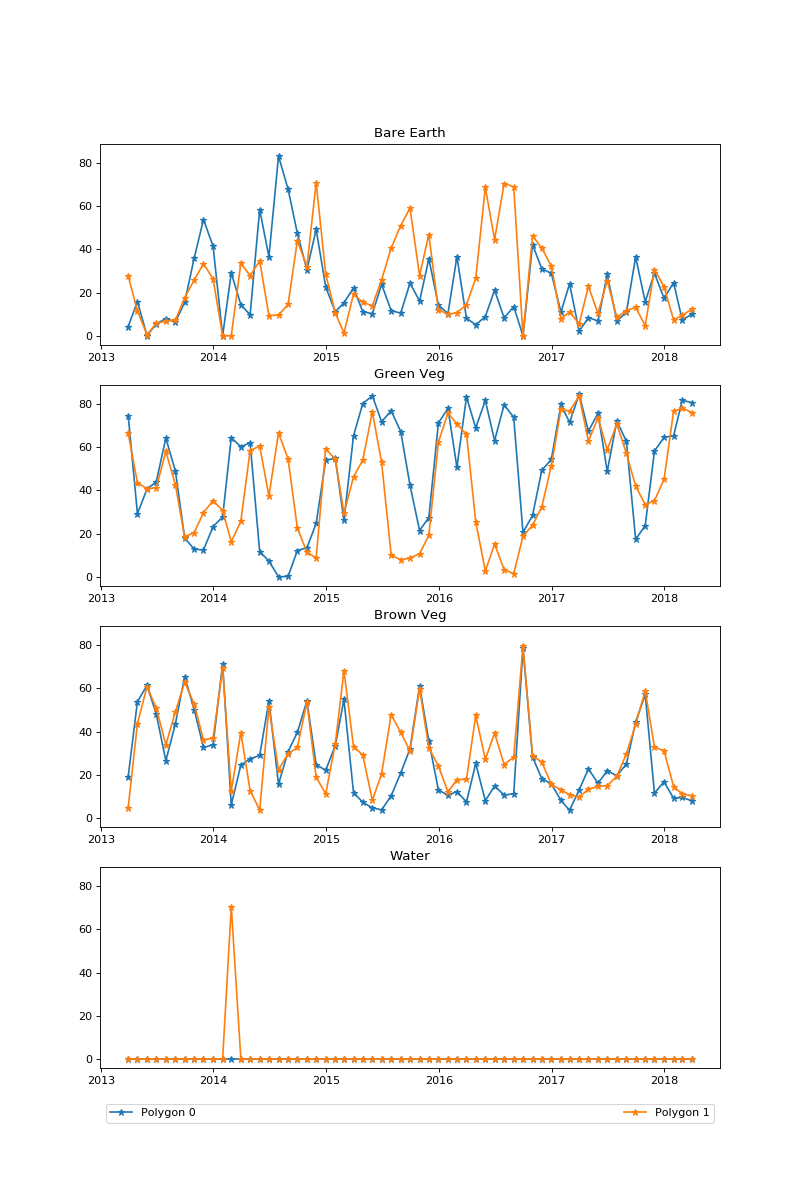

138125 139422.5428967774


In [2]:
fractional_cover_line_plot_app

For more advanced python users all elements of the cube can be extracted as per the below cells demonstrate.

Once this tool has run you are able to access the created objects

In [5]:
print (ds_all) ###This is the data cube object.

<xarray.Dataset>
Dimensions:  (time: 106, x: 131, y: 95)
Coordinates:
  * time     (time) datetime64[ns] 2013-03-27T23:45:53 2013-04-18T23:49:18 ...
  * y        (y) float64 -2.857e+06 -2.857e+06 -2.857e+06 -2.857e+06 ...
  * x        (x) float64 2.026e+06 2.026e+06 2.026e+06 2.026e+06 2.026e+06 ...
Data variables:
    BS       (time, y, x) float64 93.75 81.25 37.5 12.5 25.0 43.75 118.8 ...
    PV       (time, y, x) float64 431.2 443.8 437.5 456.2 443.8 443.8 393.8 ...
    NPV      (time, y, x) float64 93.75 87.5 143.8 143.8 137.5 125.0 100.0 ...
    UE       (time, y, x) float64 75.0 75.0 87.5 93.75 93.75 87.5 68.75 87.5 ...
    water    (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...


In [4]:
print (output_pandas) ###This is the compiled table

            BS_Polygon 0  PV_Polygon 0  NPV_Polygon 0  water_Polygon 0  \
time                                                                     
2013-03-31      4387.500     76593.750      19562.500              0.0   
2013-04-30     16168.750     29975.000      55243.750              0.0   
2013-05-31        75.000     41712.500      62887.500              0.0   
2013-06-30      5618.750     45134.375      49325.000              0.0   
2013-07-31      8153.125     65884.375      27115.625              0.0   
2013-08-31      6565.625     50178.125      44678.125              0.0   
2013-09-30     15893.750     18381.250      67118.750              0.0   
2013-10-31     37018.750     13121.875      51381.250              0.0   
2013-11-30     55187.500     12725.000      33425.000              0.0   
2013-12-31     42540.625     23843.750      34656.250              0.0   
2014-01-31         0.000     28443.750      73175.000              0.0   
2014-02-28     29837.500     66050.000

In [3]:
print (geoJSONs) # This is the shape drawn in GeoJSON IDs corresponding to the compiled table.

[{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0, 'clickable': True}, 'datasetID': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[152.391589, -24.937037], [152.39175, -24.936575], [152.393707, -24.935651], [152.395423, -24.939007], [152.392983, -24.939907], [152.391589, -24.937037]]]}}, {'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0, 'clickable': True}, 'datasetID': 1}, 'geometry': {'type': 'Polygon', 'coordinates': [[[152.395504, -24.933097], [152.390328, -24.932343], [152.39065, -24.932951], [152.39014, -24.933267], [152.390757, -24.934726], [152.391991, -24.934994], [152.391749, -24.935943], [152.396121, -24.934313], [152.395504, -24.933097]]]}}]


## Fractional Cover Line Plot App

This app will load fractional cover data for the region selected on the select case study region app, and enables users to view land cover on a stack plot. A stacked graph is useful for looking at changes in landcover added up over time, across all four components the graph creates a richer picture of (the sum of) changes.

The app will mask out any landsat cells in which water was detected and include that in the landcover summary.

Please use the draw point tool to select a single pixel, this tool will compile fractional cover information in a table and display a seperate stack plot per point.

Please use the draw polygon tool to select a region, this tool will compile fractional cover information in a table and display a seperate stack plot per polygon.

-  The line plot y-axis shows area.
-  The table shows total area per landcover.

Each interogation will be compiled into the same table but displayed on different graphs.

### This app also retrieves data from the public facing DEA before it loads. Do wait!!



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Circle', 'Rectangle', 'info', 'Polygon', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


loaded FC
loaded WOFL


103125 103053.80126053095


<IPython.core.display.Javascript object>


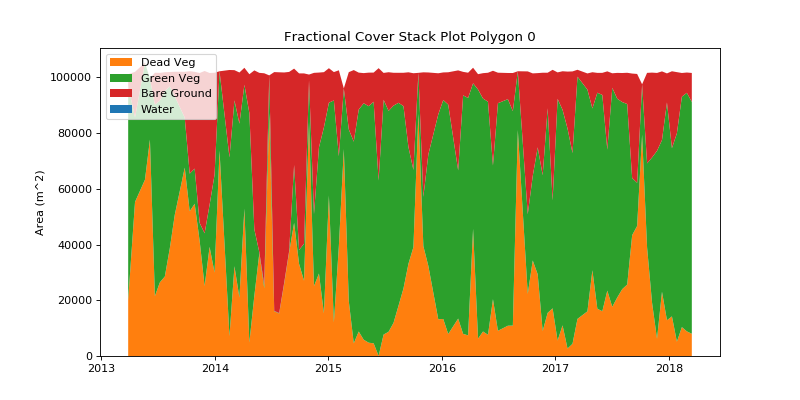

70000 69797.75030726194


<IPython.core.display.Javascript object>


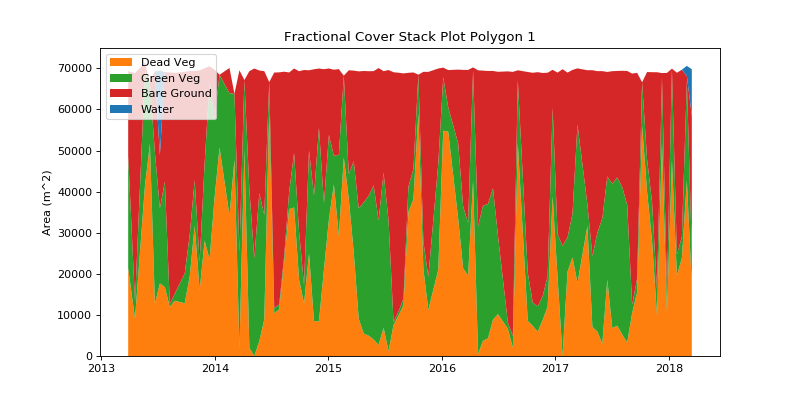

In [6]:
fractional_cover_stack_plot_app